# Exercises 20-11-2023

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Exercise 8.1
Write a program that, given a number N_max, generates N_toys toy experiments, each containing a sample of N_max events following a chosen distribution, and calculates their mean.

## Exercise 8.2
Add to the previous program a histogram that visualizes the distribution of means across the toy experiments

mean:  0.4979838264836118


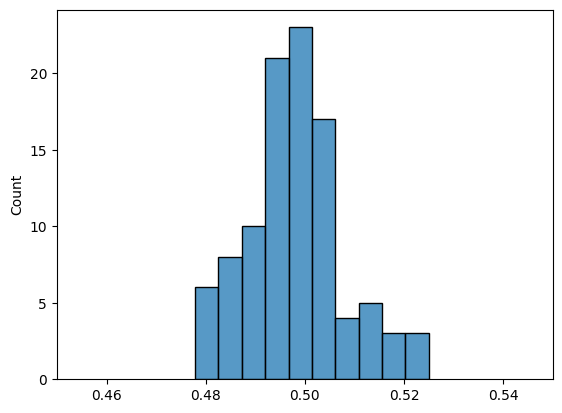

In [13]:
N_toys = 100
N_max = 1000
means = []
# uniform distribution
for i in np.arange(N_toys):
    toy = np.random.rand(N_max) # random numbers between 0 and 1
    means.append(toy.mean())

means = np.array(means)
print('mean: ', means.mean())
#plt.hist(means,bins=np.linspace(0.4,0.6,50),edgecolor='black',color='lime')

fig, ax = plt.subplots()
sns.histplot(means,bins=10, ax=ax)
ax.set_xlim(0.45,0.55)
plt.show()

## Exercise 8.3
Use the stats class developed during the previous Lectures to compare the standard deviation of the mean calculated for each individual toy with the standard deviation of the sample of means.

In [177]:
N_toys = 1000
N_max = 1000
means = []
stds = []
# uniform distribution
for i in np.arange(N_toys):
    toy = np.random.rand(N_max) # random numbers between 0 and 1
    means.append(toy.mean())
    stds.append(toy.std()/np.sqrt(N_max))

means = np.array(means)
stds = np.array(stds)
print('standard deviation of the mean for each toy: ',stds.mean())
print('standard deviation of the collection of toys: ',means.std())

standard deviation of the mean for each toy:  0.009127584539473616
standard deviation of the collection of toys:  0.009188567124711422


## Exercise 8.4
Use two scatter plots to compare the evolution of the standard deviation of the mean calculated for each individual toy with the standard deviation of the sample of means as the number of events generated in a single toy experiment varies.

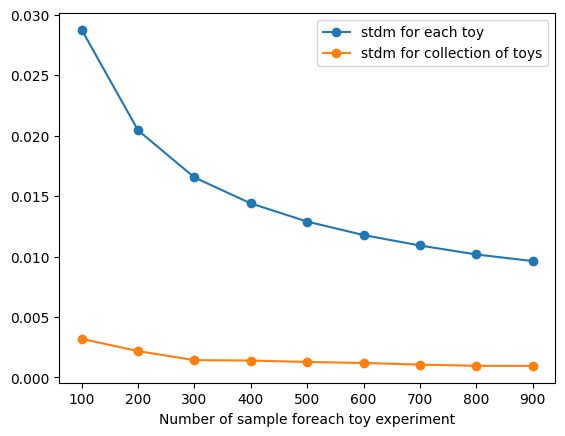

In [178]:
N_toys = 100

stdm_individual = []
stdm_toys = []

N_max = np.arange(100,1000,100)

for i_events in N_max:
    means = []
    stds = []
    # uniform distribution
    for i_toy in np.arange(1,N_toys):
        toy = np.random.rand(i_events) # random numbers between 0 and 1 ----- .normal(loc=0,scale=1,size=i) if you want nomal distribtion
        means.append(toy.mean())
        stds.append(toy.std()/np.sqrt(i_events))  # standard deviation of the mean for this toy experiment

    means = np.array(means)
    stds = np.array(stds)
    stdm_individual.append(stds.mean())
    stdm_toys.append(means.std()/np.sqrt(N_toys))

plt.plot(N_max,stdm_individual,'o-',label='stdm for each toy')
plt.plot(N_max,stdm_toys,'o-',label='stdm for collection of toys')
plt.xlabel('Number of sample foreach toy experiment')
plt.legend()
plt.show()

## Exercise 8.5
Implement the hit-or-miss integration method with the example function f(x) = sin(x).

Write the algorithm that calculates the integral as function external to the main program, ensuring it takes as input parameters the limits along the x and y axis, as well as the number of pseudo-random points to generate.

Make sure the algorithm returns a container with two elements: the first element is the value of the integral, the second is its uncertainty.

In [179]:
def integral_hit_or_miss(f,a,b,maxf):
    N = 1000
    randX = a + np.random.rand(N) * (b - a)
    randY = 0 + np.random.rand(N) * (maxf - 0)
    hit = sum(map(lambda x: x[1] < f(x[0]),zip(randX,randY)))
    p = hit/N
    expected_value = p * (b-a) * (maxf - 0)
    variance = ((b-a) * (maxf - 0))**2 * p * (1-p) / N**2
    return expected_value, np.sqrt(variance/N)

print(integral_hit_or_miss(lambda x: np.sin(x) + 1,0,np.pi,2))

(5.177344693115979, 7.566583135507289e-05)


## Exercise 8.6
Insert the calculation of the integral from the previous exercise into a loop that, as the number N of generated points varies, displays the value of the integral and its uncertainty.

Use a scatter plot to visualize the trends of the integral value and its uncertainty as N varies on a logarithmic scale.

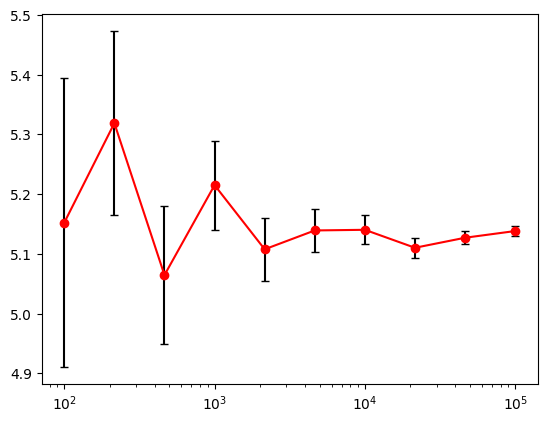

In [180]:
def integral_hit_or_miss_N(f,a,b,maxf,N):
    randX = a + np.random.rand(N) * (b - a)
    randY = 0 + np.random.rand(N) * (maxf - 0)
    hit = sum(map(lambda x: x[1] < f(x[0]),zip(randX,randY)))
    p = hit/N
    expected_value = p * (b-a) * (maxf - 0)
    variance = ((b-a) * (maxf - 0))**2 * p * (1-p) / N
    return expected_value, np.sqrt(variance)

X = np.logspace(2,5,10)
result = [integral_hit_or_miss_N(lambda x: np.sin(x) + 1,0,np.pi,2,int(i)) for i in X]

HMY = np.array([i for i,_ in result])
HMYerr = np.array([j for _,j in result])

plt.errorbar(X,HMY,fmt='o-',yerr=HMYerr,capsize=3,ecolor='black',color='red')
plt.xscale('log')
plt.show()

## Exercise 8.7
Implement the crude-MC integration method with the example function f(x) = sin(x).

Write the algorithm that calculates the integral as a function external to the main program, ensuring it takes as input parameters the limits along the x axis and the number of pseudo-random points to generate.

Make sure the algorithm returns a container with two elements: the first element is the value of the integral, the second is its uncertainty.

In [181]:
def crude_montecarlo(f,a,b,N=1000):
    X = a + np.random.rand(N) * (b-a)
    E = np.average([f(X)])
    STD = np.std(f(X))
    return (b-a)*E, (b-a)*STD/np.sqrt(N)

print(crude_montecarlo(lambda x: np.sin(x) + 1,0,np.pi,2))

(3.953198628109545, 0.30147386894282957)


## Exercise 8.8
Insert the calculation of the integral from the previous exercise into a loop that, as the number N of generated points varies, displays the value of the integral and its uncertainty.

Plot the trends of the integral value and its uncertainty as N varies on a logarithmic scale.

Overlay this behavior with the one obtained from completing Exercise 8.6.


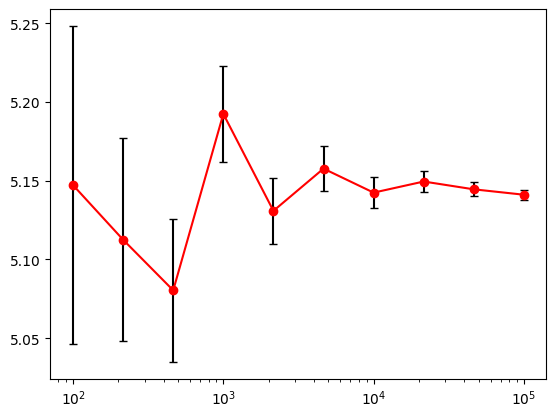

In [182]:
X = np.logspace(2,5,10)
result = [crude_montecarlo(lambda x: np.sin(x) + 1,0,np.pi,int(i)) for i in X]

CMY = np.array([i for i,_ in result])
CMYerr = np.array([j for _,j in result])

plt.errorbar(X,CMY,fmt='o-',yerr=CMYerr,capsize=3,ecolor='black',color='red')
plt.xscale('log')
plt.show()

## HIT-OR-MISS vs CRUDE MONTECARLO

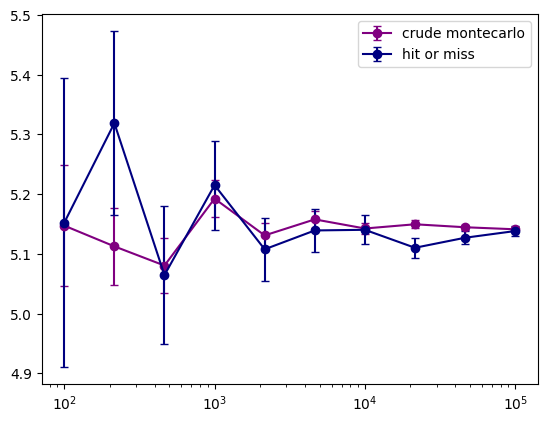

In [183]:
X = np.logspace(2,5,10)
plt.errorbar(X,CMY,fmt='o-',yerr=CMYerr,capsize=3,ecolor='purple',color='purple',label='crude montecarlo')
plt.errorbar(X,HMY,fmt='o-',yerr=HMYerr,capsize=3,ecolor='navy',color='navy',label='hit or miss')
plt.xscale('log')
plt.legend()
plt.show()

## Exercise 8.9
Use the hit-or-miss method to estimate the integral underlying a Gaussian probability distribution with μ=0 and σ=1 within a generic interval [a,b].

Calculate the integral contained within the intervals [-kσ, kσ] as k varies from 1 to 5.

In [184]:
def crude_montecarlo_norm(a,b,mu=0,sigma=1,N=1000):
    X = np.linspace(a,b,N)
    f = norm(loc=mu,scale=sigma).pdf
    E = np.average([f(X)])
    STD = np.std(f(X))
    return (b-a)*E, (b-a)*STD/np.sqrt(N)

for i in range(1,6):
    print(f'{i} sigma: ',crude_montecarlo_norm(-i,i))

1 sigma:  (0.6824905826186739, 0.003067281221857591)
2 sigma:  (0.9537609119936064, 0.014572729536066083)
3 sigma:  (0.9963294149704383, 0.026422854298910912)
4 sigma:  (0.9989377857848977, 0.035448904670861175)
5 sigma:  (0.9989994420133419, 0.042662947444755385)
